# **Дискретное вейвлет преобразование (discrete wavelet transform, DWT)**
Тропина Анна РИ-380013

**Вейвлет** — математическая функция, позволяющая анализировать различные частотные компоненты данных.

**Вейвлет-преобразование** — интегральное преобразование, которое представляет собой свертку вейвлет-функции с сигналом. Вейвлет-преобразование переводит сигнал из временного представления в частотно-временное.

**Дискретное вейвлет-преобразование (DWT)** - реализация вейвлет-преобразования с использованием дискретного набора масштабов и переносов вейвлета, подчиняющихся некоторым определённым правилам. Другими словами, это преобразование раскладывает сигнал на взаимно ортогональный набор вейвлетов, что является основным отличием от непрерывного вейвлет-преобразования (CWT), или его реализации для дискретных временных рядов, иногда называемой непрерывным вейвлет-преобразованием дискретного времени (DT-CWT).

Дискретное вейвлет-преобразование имеет огромное количество применений в науке, технике, математике и информатике. Наиболее примечательно, что он используется для *кодирования сигналов*, для *представления дискретного сигнала в более избыточной форме*, часто в качестве предварительной подготовки для *сжатия данных*. Практическое применение также можно найти в обработке сигналов ускорений для *анализа походки*, *обработке изображений*, в *цифровой связи* и многих других.

Показано, что дискретное вейвлет-преобразование (дискретное по масштабу и сдвигу и непрерывное по времени) успешно реализуется в качестве аналогового банка фильтров в биомедицинской обработке сигналов для проектирования маломощных кардиостимуляторов, а также в сверхширокополосной (UWB) беспроводной связи.







**Дискретное вейвлет – преобразование**

Для демонстрации DWT используем сигнал с динамическим частотным спектром, который со временем увеличивается. Начало сигнала содержит низкочастотные значения, а конец сигнала содержит частоты коротковолнового диапазона. Это позволит нам легко определить, какая часть частотного спектра отфильтрована, просто взглянув на временную ось:

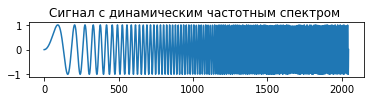

In [18]:
from pylab import *
from numpy import*
x = linspace(0, 1, num=2048)
chirp_signal = sin(250 * pi * x**2)    
fig, ax = subplots(figsize=(6,1))
ax.set_title("Сигнал с динамическим частотным спектром ")
ax.plot(chirp_signal) 
show()

# Пример

На произвольную выборку применим **DWT**, используя Вейвлеты Добеши (db1)

In [14]:
import pywt
cA, cD = pywt.dwt([5, 2, -8, 6, 3, 9], 'db1')

где

*cA* - коэффициенты аппроксимации, они представляют выход фильтра нижних частот (фильтра усреднения) DWT. 

*cD* - коэффициенты детализации, они представляют выход фильтра высоких частот (разностного фильтра) DWT.

In [15]:
print(cA)

[ 4.94974747 -1.41421356  8.48528137]


In [16]:
print(cD)

[ 2.12132034 -9.89949494 -4.24264069]


Применим обратное DWT:

In [17]:
print(pywt.idwt(cA, cD, 'db1'))

[ 5.  2. -8.  6.  3.  9.]


**Многоуровневая декомпозиция с использованием wavedec**

Применим многоуровневое 1D Дискретное вейвлет-преобразование данных

In [23]:
from pywt import wavedec
coeffs = wavedec([5, 2, -8, 6, 3, 9], 'db1', level=2)
cA2, cD2, cD1 = coeffs

In [24]:
print(cD1)

[ 2.12132034 -9.89949494 -4.24264069]


In [25]:
print(cD2)

[4.5 0. ]


Результатом являются массивы коэффициентов деталей

In [26]:
print(cA2)

[ 2.5 12. ]


Результатом является массив коэффициентов аппроксимации

# Источники

*   Вейвлет - https://ru.wikipedia.org/wiki/Вейвлет
*   Вейвлет-преобразование - https://ru.wikipedia.org/wiki/Вейвлет-преобразование

*   Дискретное вейвлет-преобразование - http://gwyddion.net/documentation/user-guide-ru/wavelet-transform.html
*   DWT - https://en.wikipedia.org/wiki/Discrete_wavelet_transform


*   Вейвлет, анализ - https://habr.com/ru/post/451278/
